# IMAGE CLASSIFICATION

## 1.Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## 2.Load CIFAR-10 Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


## 3.Preprocess Data

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4.Visualize Sample Images

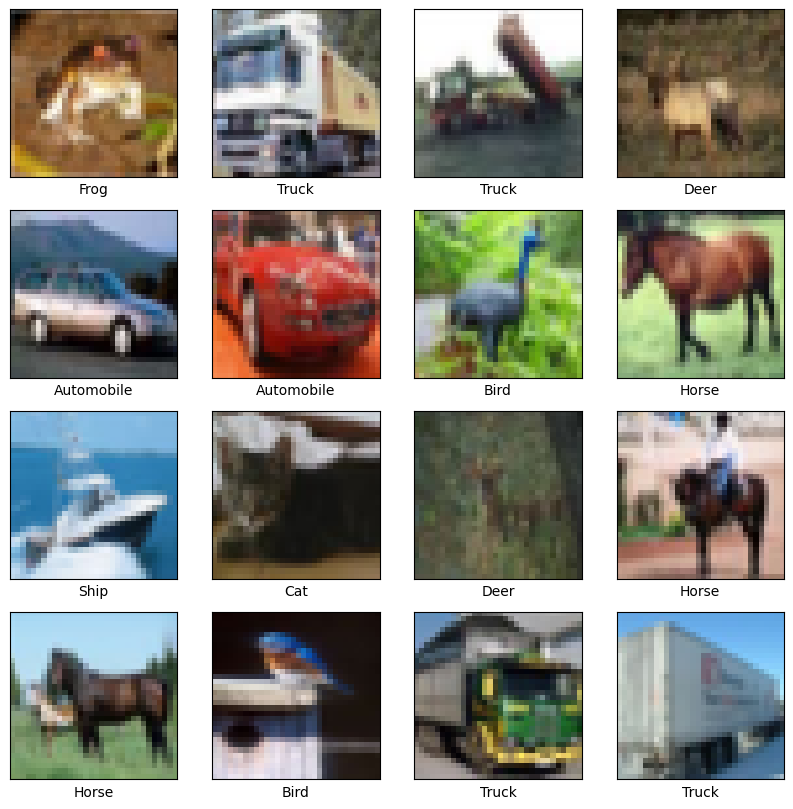

In [12]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

## 5.Build the CNN model

In [15]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

## 6.Compile the Model

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

## 7.Train the Model

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

## 8.Plot Training History

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 9.Predict on Test Images

In [ ]:
def plot_predictions(index):
    img = X_test[index]
    true_label = class_names[np.argmax(y_test[index])]
    pred_probs = model.predict(np.expand_dims(img, axis=0))
    pred_label = class_names[np.argmax(pred_probs)]
    
    plt.imshow(img)
    plt.title(f"True: {true_label} | Pred: {pred_label}")
    plt.axis('off')
    plt.show()


for i in range(5):
    plot_predictions(i)